# Imports

In [ ]:
library(tidyverse, warn.conflicts = FALSE)
library(ggthemes)
library(scales)
library(ggrepel)
library(corrplot)
library(RColorBrewer)
library(patchwork)
library(dplyr, warn.conflicts = FALSE)
library(gmodels)
library(Hmisc)
library(readr)

# SBRC paper

Comparing our Linux testbed with our ns-3 implementation.

## Testbed dataframes

In [2]:
cwnd <- read.csv("summarize/cwnd-baseline.csv")
dropped <- read.csv("summarize/dropped-baseline.csv")
ecnmark <- read.csv("summarize/ecnmark-baseline.csv")
probs <- read.csv("summarize/probs-baseline.csv")
qdelay <- read.csv("summarize/qdelay-baseline.csv")
rtt <- read.csv("summarize/rtt-baseline.csv")
truput <- read.csv("summarize/truput-baseline.csv")
retry <- read.csv("summarize/retry-baseline.csv")

## Scenario 1  (100 Mbps + 5 ms)

### ns-3 dataframes

In [ ]:
df_count_mark_l4s <- read.csv("dataframes/metrics_1/count_mark_l4s.csv")
cum_df_count_mark_l4s <- df_count_mark_l4s |>
  mutate(across(time, round, 0)) |>
  group_by(time, run_id) |>
  summarise(
    cumulative = sum(count_mark_l4s),
  )

sum_df_count_mark_l4s <- cum_df_count_mark_l4s |>
  group_by(time) |>
  summarise(
    mean = mean(cumulative),
    sd = sd(cumulative),
    ci = ci(cumulative),
    ciLow = gmodels::ci(cumulative)[2],
    ciUp = gmodels::ci(cumulative)[3],
  )

df_cubic_cwnd <- read.csv("dataframes/metrics_1/cubic_cwnd.csv")
sum_df_cubic_cwnd <- df_cubic_cwnd |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(cubic_cwnd),
    sd = sd(cubic_cwnd),
    ci = ci(cubic_cwnd),
    ciLow = gmodels::ci(cubic_cwnd)[2],
    ciUp = gmodels::ci(cubic_cwnd)[3],
  )

df_cubic_rtt <- read.csv("dataframes/metrics_1/cubic_rtt.csv")
sum_df_cubic_rtt <- df_cubic_rtt |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(cubic_rtt),
    sd = sd(cubic_rtt),
    ci = ci(cubic_rtt),
    ciLow = gmodels::ci(cubic_rtt)[2],
    ciUp = gmodels::ci(cubic_rtt)[3],
  )

df_prague_cwnd <- read.csv("dataframes/metrics_1/prague_cwnd.csv")
sum_df_prague_cwnd <- df_prague_cwnd |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(prague_cwnd),
    sd = sd(prague_cwnd),
    ci = ci(prague_cwnd),
    ciLow = gmodels::ci(prague_cwnd)[2],
    ciUp = gmodels::ci(prague_cwnd)[3],
  )

df_prague_rtt <- read.csv("dataframes/metrics_1/prague_rtt.csv")
sum_df_prague_rtt <- df_prague_rtt |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(prague_rtt),
    sd = sd(prague_rtt),
    ci = ci(prague_rtt),
    ciLow = gmodels::ci(prague_rtt)[2],
    ciUp = gmodels::ci(prague_rtt)[3],
  )

df_queue_prob_coupled <- read.csv("dataframes/metrics_1/queue_prob_coupled.csv")
sum_df_queue_prob_coupled <- df_queue_prob_coupled |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(queue_prob_coupled),
    sd = sd(queue_prob_coupled),
    ci = ci(queue_prob_coupled),
    ciLow = gmodels::ci(queue_prob_coupled)[2],
    ciUp = gmodels::ci(queue_prob_coupled)[3],
  )

df_queue_sojourn_classic <- read.csv("dataframes/metrics_1/queue_sojourn_classic.csv")
sum_df_queue_sojourn_classic <- df_queue_sojourn_classic |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(queue_sojourn_classic),
    sd = sd(queue_sojourn_classic),
    ci = ci(queue_sojourn_classic),
    ciLow = gmodels::ci(queue_sojourn_classic)[2],
    ciUp = gmodels::ci(queue_sojourn_classic)[3],
  )

df_queue_sojourn_l4s <- read.csv("dataframes/metrics_1/queue_sojourn_l4s.csv")
sum_df_queue_sojourn_l4s <- df_queue_sojourn_l4s |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(queue_sojourn_l4s),
    sd = sd(queue_sojourn_l4s),
    ci = ci(queue_sojourn_l4s),
    ciLow = gmodels::ci(queue_sojourn_l4s)[2],
    ciUp = gmodels::ci(queue_sojourn_l4s)[3],
  )

df_throughput_cubic <- read.csv("dataframes/metrics_1/throughput_cubic.csv")
sum_df_throughput_cubic <- df_throughput_cubic |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(throughput_cubic),
    sd = sd(throughput_cubic),
    ci = ci(throughput_cubic),
    ciLow = gmodels::ci(throughput_cubic)[2],
    ciUp = gmodels::ci(throughput_cubic)[3],
  )

df_throughput_prague <- read.csv("dataframes/metrics_1/throughput_prague.csv")
sum_df_throughput_prague <- df_throughput_prague |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(throughput_prague),
    sd = sd(throughput_prague),
    ci = ci(throughput_prague),
    ciLow = gmodels::ci(throughput_prague)[2],
    ciUp = gmodels::ci(throughput_prague)[3],
  )

### Throughput

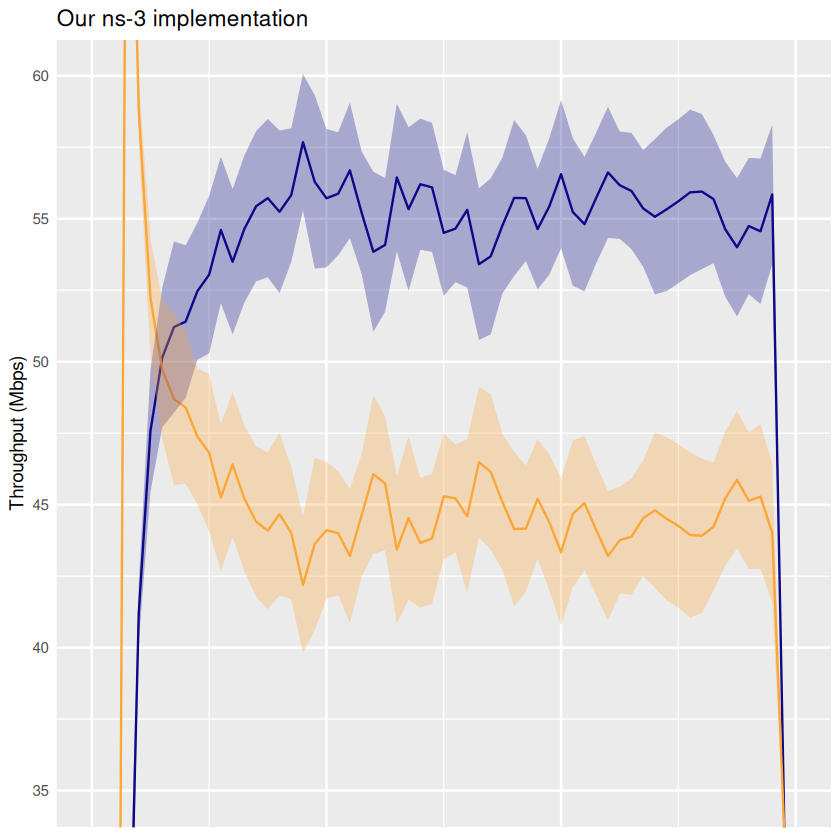

In [4]:
gtruput_s1_ns3 <- ggplot(sum_df_throughput_prague,
                         aes(x = time, y = mean)) +
geom_line(color = "#0D0887") +
geom_line(data = sum_df_throughput_cubic,
          aes(x = time, y = mean),
          color = "#FCA636") +
geom_ribbon(data = sum_df_throughput_prague,
            aes(ymin = ciLow, ymax = ciUp),
            fill = "#0D0887",
            alpha = 0.3) +
geom_ribbon(data = sum_df_throughput_cubic,
            aes(ymin = ciLow, ymax = ciUp),
            fill = "#FCA636",
            alpha = 0.3) +
coord_cartesian(ylim = c(35, 60), xlim = c(0, 60)) +
ggtitle("Our ns-3 implementation") +
xlab(NULL) +
ylab("Throughput (Mbps)") +
theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank()
)
suppressWarnings(print(gtruput_s1_ns3))

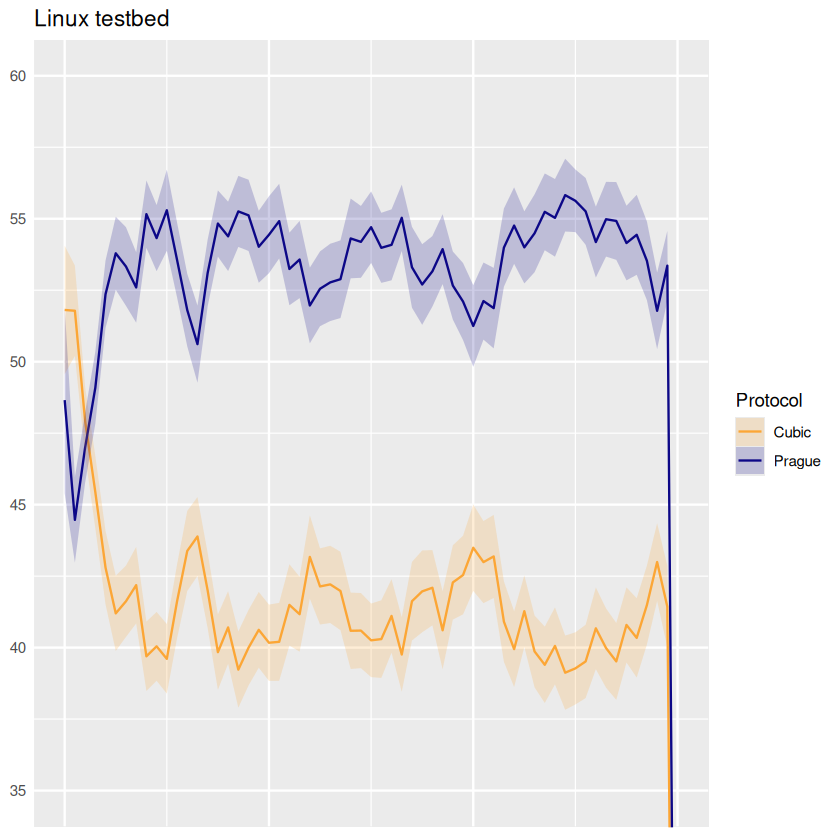

In [5]:
gtruput_s1_tb <- ggplot(truput |>
                  filter(AQM == "DualPI2") |>
                  filter(bw.limit == "100 Mbps & 5 ms"),
                  aes(x = time.round, y = mean)) +
geom_line(aes(color = Protocol)) +
geom_ribbon(aes(ymin = ciLow, ymax = ciUpp, fill = Protocol), alpha = 0.2) +
coord_cartesian(ylim = c(35, 60), xlim = c(0, 60)) +
scale_color_viridis_d(option = "plasma", begin = 0., end = 0.8, direction = -1) +
scale_fill_viridis_d(option = "plasma", begin = 0., end = 0.8, direction = -1) +
ggtitle("Linux testbed") +
xlab(NULL) +
ylab(NULL) +
theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank()
)
suppressWarnings(print(gtruput_s1_tb))

### RTT

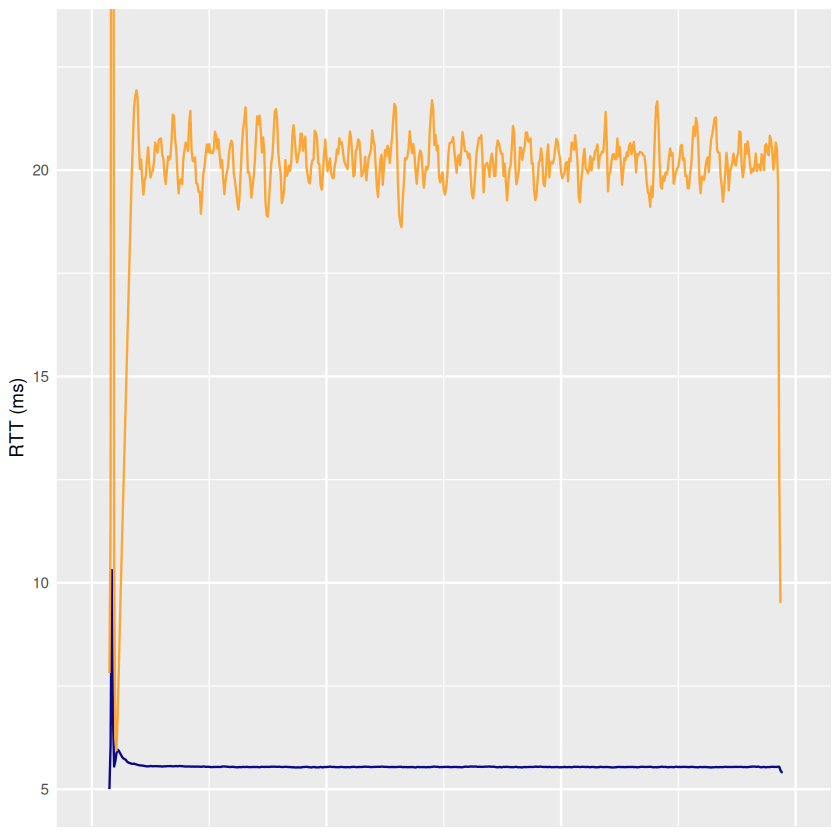

In [10]:
grtt_s1_ns3 <- ggplot(sum_df_prague_rtt,
       aes(x = time, y = mean*1000)) +
geom_line(color = "#0D0887") +
geom_line(data = sum_df_cubic_rtt,
          aes(x = time, y = mean*1000),
          color = "#FCA636") +
geom_ribbon(data = sum_df_prague_rtt*1000,
            aes(ymin = ciLow, ymax = ciUp), fill = "#0D0887", alpha = 1) +
geom_ribbon(data = sum_df_cubic_rtt*1000,
            aes(ymin = ciLow, ymax = ciUp), fill = "#FCA636", alpha = 1) +
coord_cartesian(ylim = c(5, 23), xlim = c(0, 60)) +
xlab(NULL) +
ylab("RTT (ms)") +
theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank()
)
suppressWarnings(print(grtt_s1_ns3))

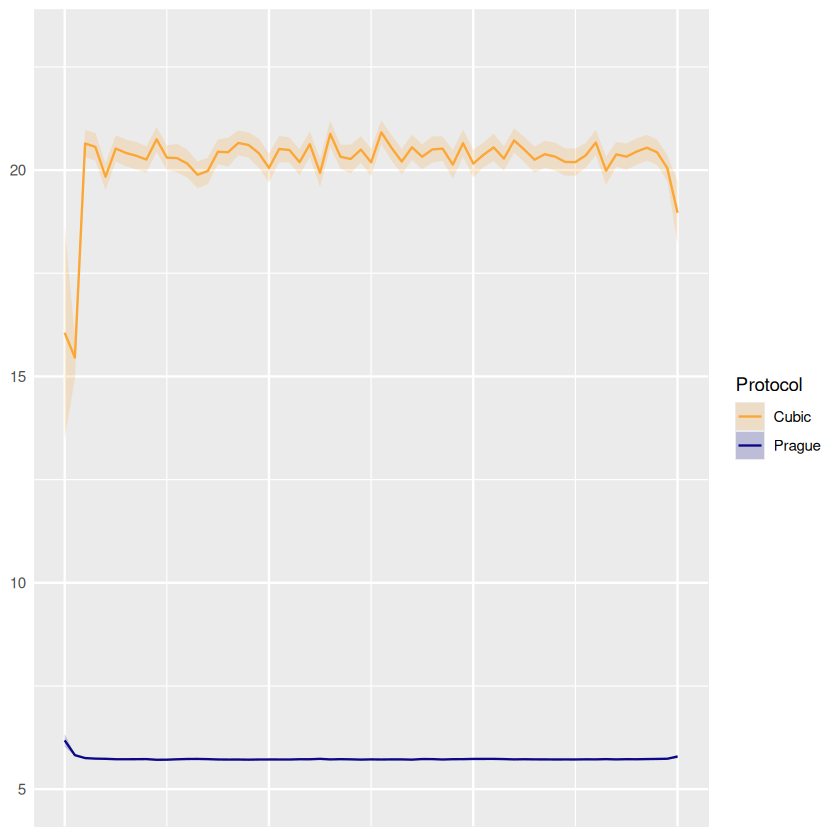

In [8]:
grtt_s1_tb <- ggplot(rtt |>
                  filter(AQM == "DualPI2") |>
                  filter(bw.limit == "100 Mbps & 5 ms"),
                  aes(x = time.round, y = mean)) +
geom_line(aes(color = Protocol)) +
geom_ribbon(aes(ymin = ciLow, ymax = ciUpp, fill = Protocol), alpha = 0.2) +
scale_color_viridis_d(option = "plasma", begin = 0., end = 0.8, direction = -1) +
scale_fill_viridis_d(option = "plasma", begin = 0., end = 0.8, direction = -1) +
coord_cartesian(ylim = c(5, 23)) +
xlab(NULL) +
ylab(NULL) +
theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank()
)
suppressWarnings(print(grtt_s1_tb))

### CWnd

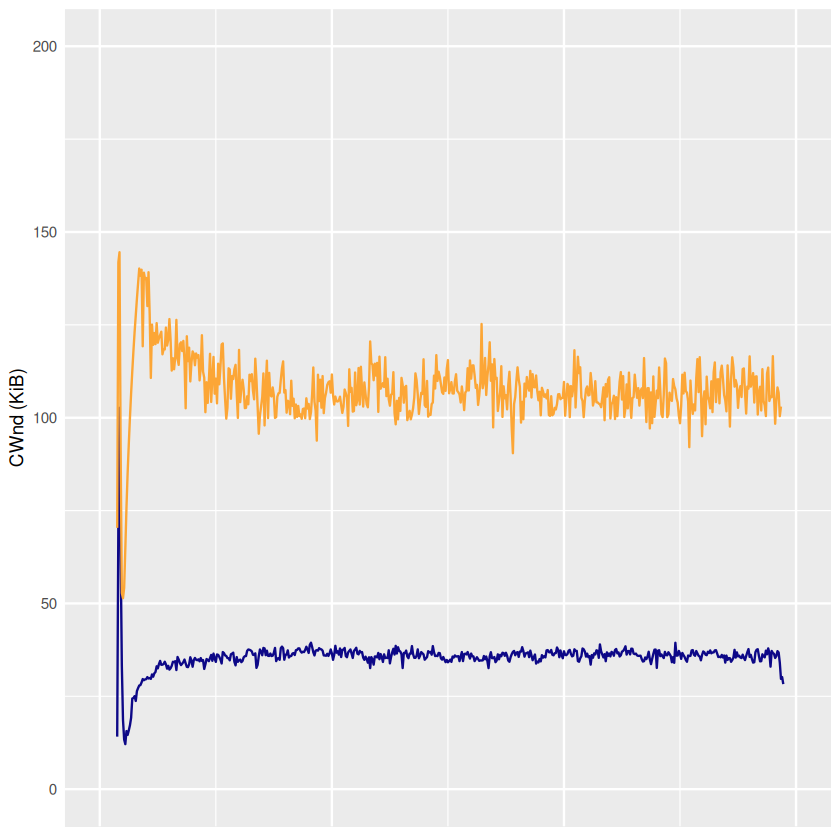

In [11]:
gcwnd_s1_ns3 <- ggplot(sum_df_prague_cwnd,
       aes(x = time, y = (mean/1024))) +
geom_line(color = "#0D0887") +
geom_line(data = sum_df_cubic_cwnd,
          aes(x = time, y = (mean/1024)),
          color = "#FCA636") +
geom_ribbon(data = sum_df_prague_rtt*1000,
            aes(ymin = ciLow, ymax = ciUp), fill = "#0D0887", alpha = 1) +
geom_ribbon(data = sum_df_cubic_rtt*1000,
            aes(ymin = ciLow, ymax = ciUp), fill = "#FCA636", alpha = 1) +
coord_cartesian(ylim = c(0, 200), xlim = c(0, 60)) +
xlab(NULL) +
ylab("CWnd (KiB)") +
theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank()
)
suppressWarnings(print(gcwnd_s1_ns3))

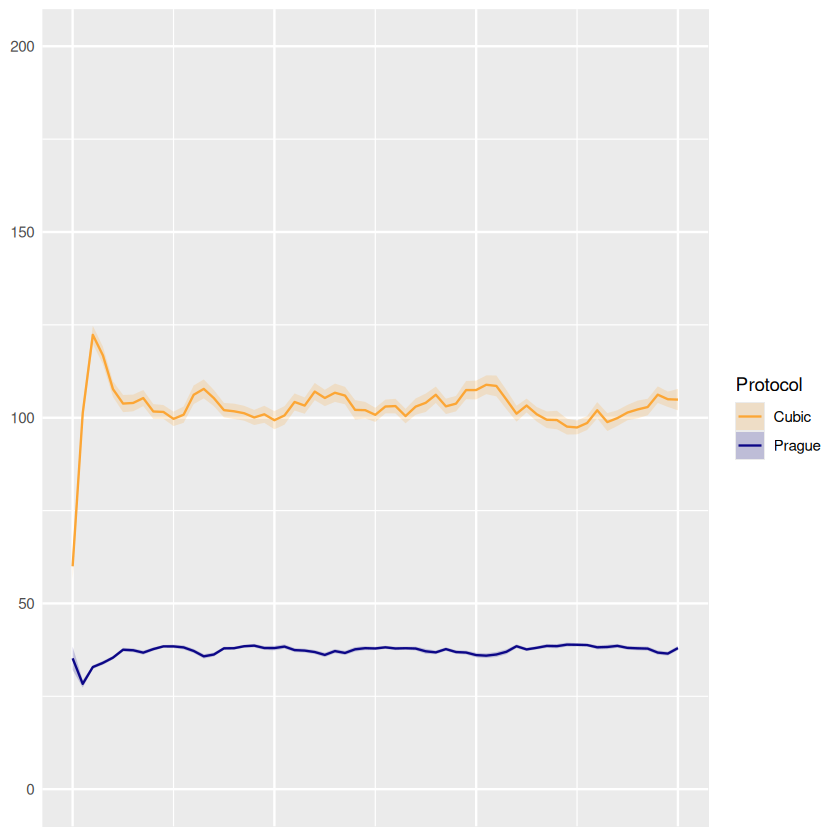

In [10]:
gcwnd_s1_tb <- ggplot(cwnd |>
                  filter(AQM == "DualPI2") |>
                  filter(bw.limit == "100 Mbps & 5 ms"),
                  aes(x = time.round, y = mean)) +
geom_line(aes(color = Protocol)) +
geom_ribbon(aes(ymin = ciLow, ymax = ciUpp, fill = Protocol), alpha = 0.2) +
scale_color_viridis_d(option = "plasma", begin = 0., end = 0.8, direction = -1) +
scale_fill_viridis_d(option = "plasma", begin = 0., end = 0.8, direction = -1) +
coord_cartesian(ylim = c(0, 200)) +
xlab(NULL) +
ylab(NULL) +
theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank()
)
suppressWarnings(print(gcwnd_s1_tb))

### Queue delay

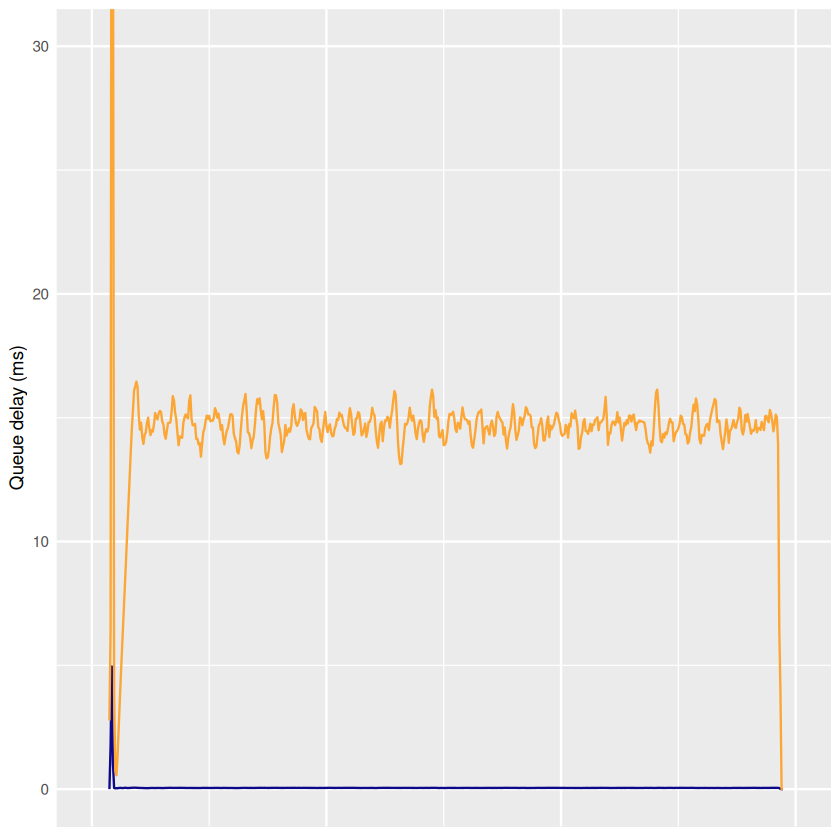

In [11]:
gqdelay_s1_ns3 <- ggplot(sum_df_queue_sojourn_l4s,
       aes(x = time, y = mean*1000)) + # s -> ms
geom_line(color = "#0D0887") +
geom_line(data = sum_df_queue_sojourn_classic,
          aes(x = time, y = mean*1000),
          color="#FCA636") +
geom_ribbon(data = sum_df_queue_sojourn_l4s,
            aes(ymin = ciLow, ymax = ciUp),  fill = "#0D0887", alpha = 0.3) +
geom_ribbon(data = sum_df_queue_sojourn_classic,
            aes(ymin = ciLow, ymax = ciUp),  fill = "#FCA636", alpha = 0.3) +
coord_cartesian(ylim = c(0, 30), xlim = c(0, 60)) +
xlab(NULL) +
ylab("Queue delay (ms)") +
theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank()
)
suppressWarnings(print(gqdelay_s1_ns3))

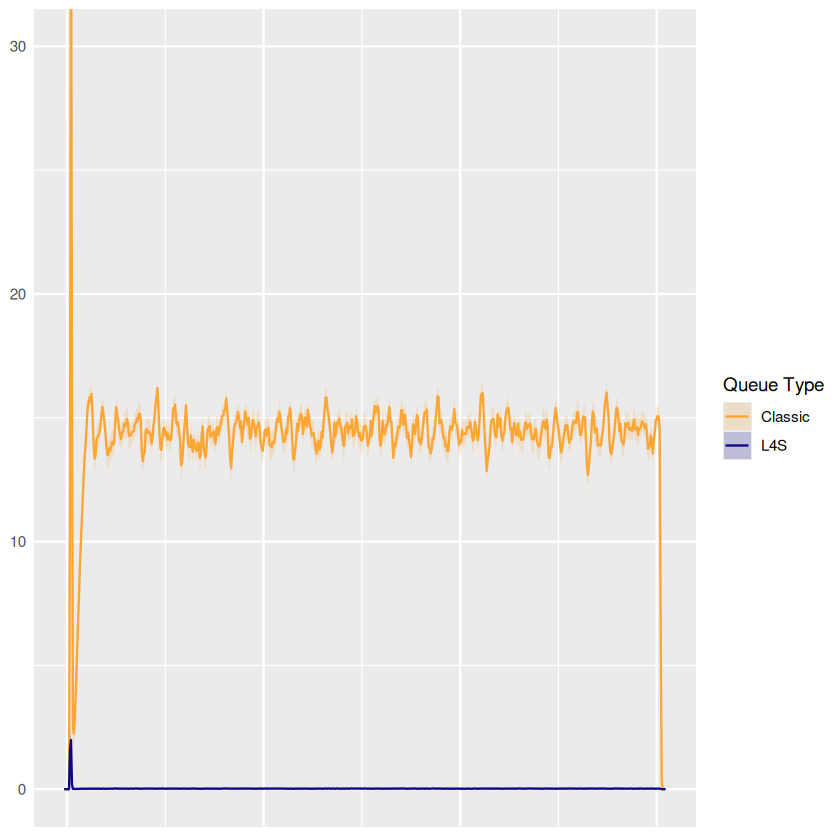

In [12]:
gqdelay_s1_tb <- ggplot(qdelay |>
                  filter(bw.limit == "100 Mbps & 5 ms") |>
                  filter(AQM == "DualPI2") |>
                  filter(time >= 3),
                  aes(x = time - 3.3, y = mean)) +
geom_line(aes(color = Delay.type)) +
geom_ribbon(aes(ymin = ciLow, ymax = ciUpp, fill = Delay.type), alpha = 0.2) +
coord_cartesian(ylim = c(0, 30)) +
scale_color_viridis_d(option = "plasma", begin = 0., end = 0.8, direction = -1) +
scale_fill_viridis_d(option = "plasma", begin = 0., end = 0.8, direction = -1) +
xlab(NULL) +
ylab(NULL) +
labs(colour = "Queue Type", fill = "Queue Type") +
theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank()
)
suppressWarnings(print(gqdelay_s1_tb))

### ECN mark

In the paper we use packets/0.1s granularity. Now this is packets/s.

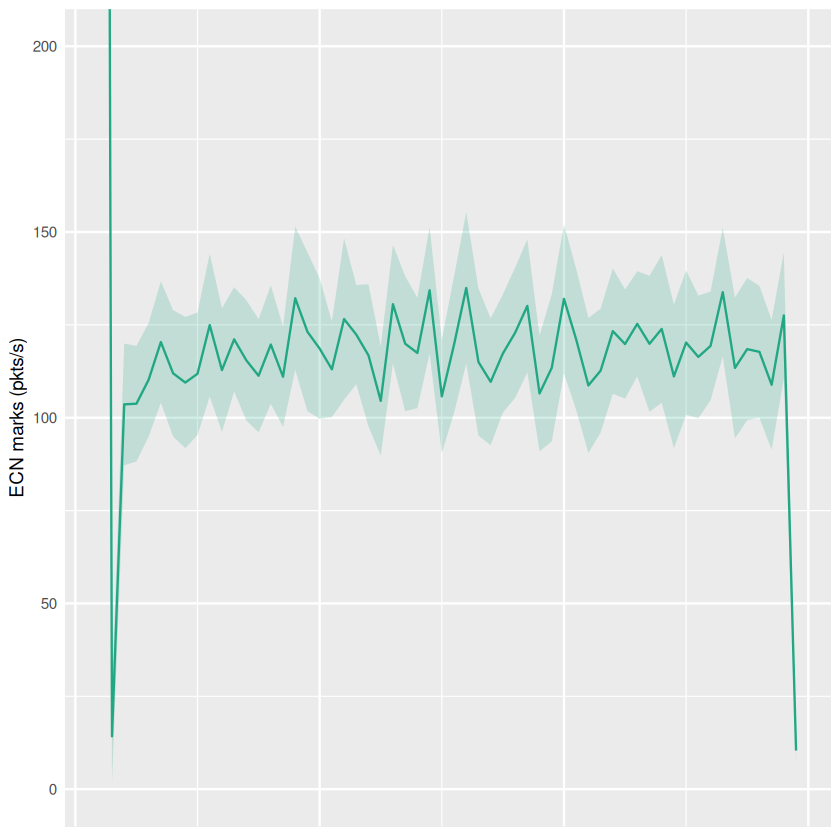

In [31]:
gecnmark_s1_ns3 <- ggplot(sum_df_count_mark_l4s,
       aes(x = time, y = mean)) +
geom_line(color = "#22a884") +
coord_cartesian(ylim = c(0, 200)) +
geom_ribbon(aes(ymin = ciLow, ymax = ciUp), fill="#22a884", alpha = 0.2) +
xlab(NULL) +
ylab("ECN marks (pkts/s)") +
theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank()
)


suppressWarnings(print(gecnmark_s1_ns3)) 

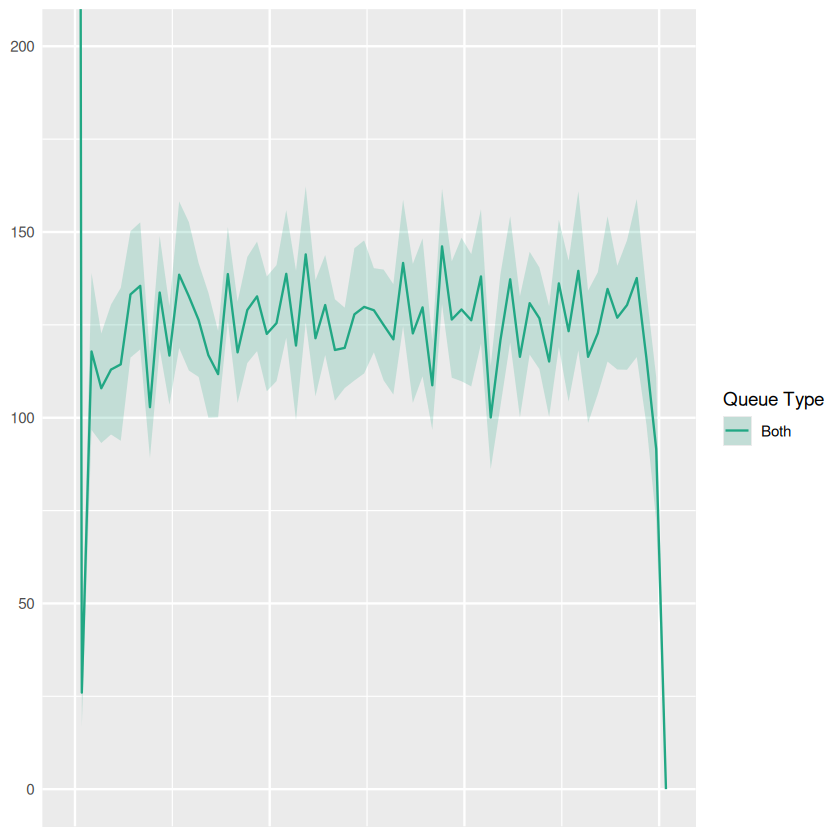

In [32]:
gecnmark_s1_tb <- ggplot(ecnmark |>
                  filter(AQM == "DualPI2") |>
                  filter(Delay.type == "Classic") |>
                  filter(bw.limit == "100 Mbps & 5 ms") |>
                  mutate(Delay.type = recode(Delay.type, "Classic" = "Both")) |>                  
                  filter(time.round >= 3),
                  aes(x = time.round - 3.3, y = mean)) +
geom_line(aes(color = Delay.type)) +
geom_ribbon(aes(ymin = ciLow, ymax = ciUpp, fill = Delay.type), alpha = 0.2) +
scale_color_viridis_d(option = "viridis", begin = 0., end = 0.6, direction = -1) +
scale_fill_viridis_d(option = "viridis", begin = 0., end = 0.6, direction = -1) +
coord_cartesian(ylim = c(0, 200)) +
xlab(NULL) +
ylab(NULL) +
labs(colour = "Queue Type", fill = "Queue Type") +
theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank()
)

suppressWarnings(print(gecnmark_s1_tb))

### Prob

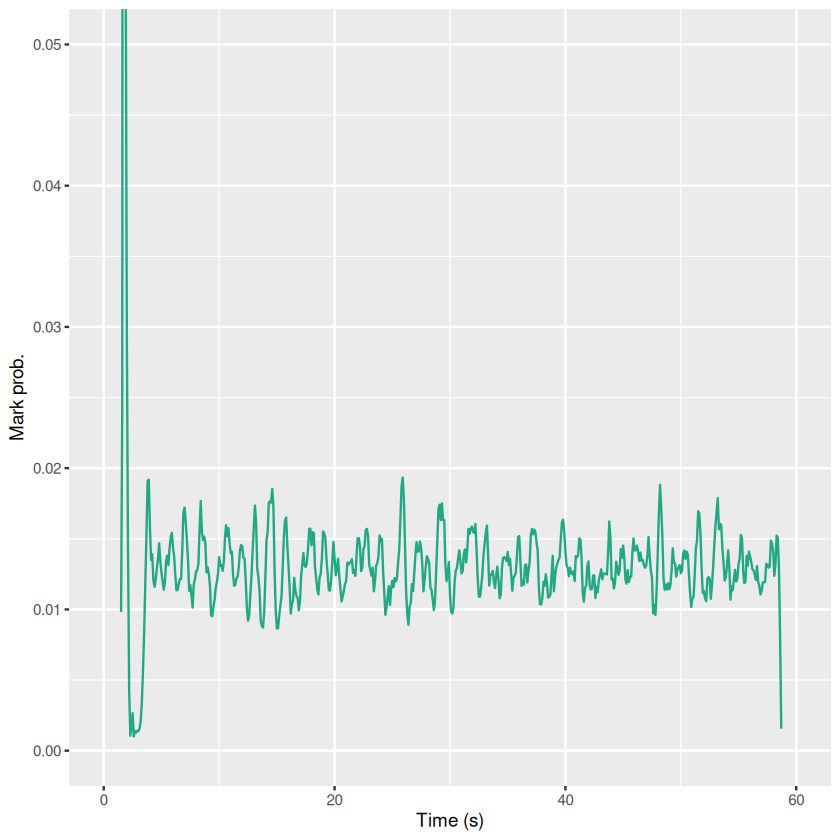

In [15]:
gprob_s1_ns3 <- ggplot(sum_df_queue_prob_coupled,
       aes(x = time, y = mean/2)) +
geom_line(color = "#22a884") +
coord_cartesian(ylim = c(0, 0.05), xlim = c(0, 60)) +
xlab("Time (s)") +
ylab("Mark prob.")
suppressWarnings(print(gprob_s1_ns3))

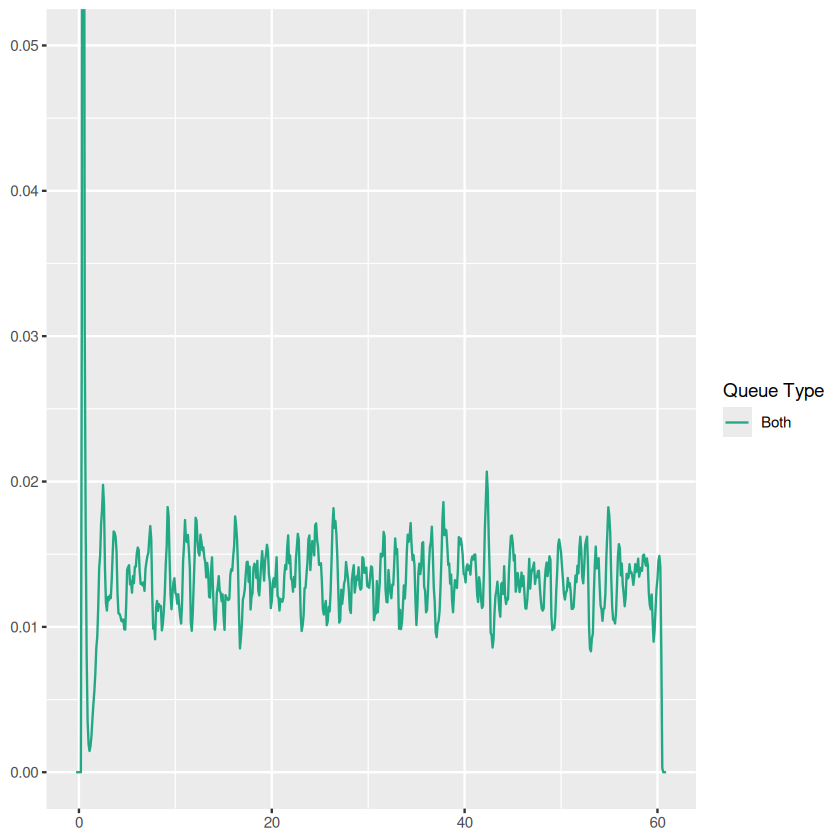

In [57]:
gprob_s1_tb <- ggplot(probs |>
                  filter(AQM == "DualPI2") |>
                  filter(Delay.type == "Classic") |>
                  filter(bw.limit == "100 Mbps & 5 ms") |>
                  mutate(Delay.type = recode(Delay.type, "Classic" = "Both")) |>                  
                  filter(time >= 3),
                  aes(x = time - 3.3, y = mean)) +
geom_line(aes(color = Delay.type)) +
scale_color_viridis_d(option = "viridis", begin = 0., end = 0.6, direction = -1) +
scale_fill_viridis_d(option = "viridis", begin = 0., end = 0.6, direction = -1) +
coord_cartesian(ylim = c(0, 0.05)) +
xlab(NULL) +
ylab(NULL) +
labs(colour = "Queue Type", fill = "Queue Type")

suppressWarnings(print(gprob_s1_tb))

### save

In [17]:
ggsave(
    "plots/scenario1-100mbps-5ms.pdf",
    plot = ((gtruput_s1_ns3 | gtruput_s1_tb) /
            (grtt_s1_ns3 | grtt_s1_tb) /
            (gcwnd_s1_ns3 | gcwnd_s1_tb) /
            (gqdelay_s1_ns3 | gqdelay_s1_tb) /
            (gecnmark_s1_ns3 | gecnmark_s1_tb)/
            (gprob_s1_ns3 | gprob_s1_tb))  + plot_layout(guides = 'collect') &
    theme_minimal() +
    theme(
        plot.title   = element_text(size = 18, family = "Carlito",
                                    margin = margin(0,0,15,0,"pt")),
        strip.text.x = element_text(size = 10, family = "Carlito", hjust=0),
        strip.background = element_rect(fill = "#f7f7f7", color = "#d9d9d9"),
        strip.text.y = element_text(size = 10, family = "Carlito", hjust=0),
        axis.title.y = element_text(size = 10,
                                    family = "Carlito",
                                    hjust = 1,
                                    margin = margin(0,5,0,0,"pt")),
        axis.title.x = element_text(size = 10, family = "Carlito", hjust=0),
        axis.ticks = element_blank(),
        legend.title = element_text(family = "Carlito"),
        legend.background = element_rect(fill = "#f7f7f7", color = "#d9d9d9"),
        legend.justification = c(0,1),
        legend.position = "bottom",
        legend.text = element_text(size = 10, family = "Carlito"),
        panel.border = element_rect(color = "#d9d9d9", fill = NA)
    ),
    height = 10,
    width = 7,
    device = cairo_pdf,
    dpi = 160,
)

## Scenario 2 (10 Mbps + 30 ms)

In [ ]:
df_count_mark_l4s <- read.csv("dataframes/metrics_2/count_mark_l4s.csv")
cum_df_count_mark_l4s <- df_count_mark_l4s |>
  mutate(across(time, round, 0)) |>
  group_by(time, run_id) |>
  summarise(
    cumulative = sum(count_mark_l4s),
  )

sum_df_count_mark_l4s <- cum_df_count_mark_l4s |>
  group_by(time) |>
  summarise(
    mean = mean(cumulative),
    sd = sd(cumulative),
    ci = ci(cumulative),
    ciLow = gmodels::ci(cumulative)[2],
    ciUp = gmodels::ci(cumulative)[3],
  )

df_cubic_cwnd <- read.csv("dataframes/metrics_2/cubic_cwnd.csv")
sum_df_cubic_cwnd <- df_cubic_cwnd |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(cubic_cwnd),
    sd = sd(cubic_cwnd),
    ci = ci(cubic_cwnd),
    ciLow = gmodels::ci(cubic_cwnd)[2],
    ciUp = gmodels::ci(cubic_cwnd)[3],
  )

df_cubic_rtt <- read.csv("dataframes/metrics_2/cubic_rtt.csv")
sum_df_cubic_rtt <- df_cubic_rtt |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(cubic_rtt),
    sd = sd(cubic_rtt),
    ci = ci(cubic_rtt),
    ciLow = gmodels::ci(cubic_rtt)[2],
    ciUp = gmodels::ci(cubic_rtt)[3],
  )

df_prague_cwnd <- read.csv("dataframes/metrics_2/prague_cwnd.csv")
sum_df_prague_cwnd <- df_prague_cwnd |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(prague_cwnd),
    sd = sd(prague_cwnd),
    ci = ci(prague_cwnd),
    ciLow = gmodels::ci(prague_cwnd)[2],
    ciUp = gmodels::ci(prague_cwnd)[3],
  )

df_prague_rtt <- read.csv("dataframes/metrics_2/prague_rtt.csv")
sum_df_prague_rtt <- df_prague_rtt |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(prague_rtt),
    sd = sd(prague_rtt),
    ci = ci(prague_rtt),
    ciLow = gmodels::ci(prague_rtt)[2],
    ciUp = gmodels::ci(prague_rtt)[3],
  )

df_queue_prob_coupled <- read.csv("dataframes/metrics_2/queue_prob_coupled.csv")
sum_df_queue_prob_coupled <- df_queue_prob_coupled |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(queue_prob_coupled),
    sd = sd(queue_prob_coupled),
    ci = ci(queue_prob_coupled),
    ciLow = gmodels::ci(queue_prob_coupled)[2],
    ciUp = gmodels::ci(queue_prob_coupled)[3],
  )

df_queue_sojourn_classic <- read.csv("dataframes/metrics_2/queue_sojourn_classic.csv")
sum_df_queue_sojourn_classic <- df_queue_sojourn_classic |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(queue_sojourn_classic),
    sd = sd(queue_sojourn_classic),
    ci = ci(queue_sojourn_classic),
    ciLow = gmodels::ci(queue_sojourn_classic)[2],
    ciUp = gmodels::ci(queue_sojourn_classic)[3],
  )

df_queue_sojourn_l4s <- read.csv("dataframes/metrics_2/queue_sojourn_l4s.csv")
sum_df_queue_sojourn_l4s <- df_queue_sojourn_l4s |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(queue_sojourn_l4s),
    sd = sd(queue_sojourn_l4s),
    ci = ci(queue_sojourn_l4s),
    ciLow = gmodels::ci(queue_sojourn_l4s)[2],
    ciUp = gmodels::ci(queue_sojourn_l4s)[3],
  )

df_throughput_cubic <- read.csv("dataframes/metrics_2/throughput_cubic.csv")
sum_df_throughput_cubic <- df_throughput_cubic |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(throughput_cubic),
    sd = sd(throughput_cubic),
    ci = ci(throughput_cubic),
    ciLow = gmodels::ci(throughput_cubic)[2],
    ciUp = gmodels::ci(throughput_cubic)[3],
  )

df_throughput_prague <- read.csv("dataframes/metrics_2/throughput_prague.csv")
sum_df_throughput_prague <- df_throughput_prague |>
  mutate(across(time, round, 1)) |>
  group_by(time) |>
  summarise(
    mean = mean(throughput_prague),
    sd = sd(throughput_prague),
    ci = ci(throughput_prague),
    ciLow = gmodels::ci(throughput_prague)[2],
    ciUp = gmodels::ci(throughput_prague)[3],
  )

In [ ]:
# just fot comparison on the paper's discussion

df_queue_sojourn_classic |>
  summarise(
    mean = mean(queue_sojourn_classic)*1000,
    sd = sd(queue_sojourn_classic)*1000,
    ci = ci(queue_sojourn_classic)*1000,
    median = quantile(queue_sojourn_classic, probs=0.5)*1000,
    nnthperc = quantile(queue_sojourn_classic, probs=0.99)*1000,
    ciLow = gmodels::ci(queue_sojourn_classic)[2]*1000,
    ciUp = gmodels::ci(queue_sojourn_classic)[3]*1000,
  )

df_queue_sojourn_l4s |>
  summarise(
    mean = mean(queue_sojourn_l4s)*1000,
    sd = sd(queue_sojourn_l4s)*1000,
    ci = ci(queue_sojourn_l4s)*1000,
    median = quantile(queue_sojourn_l4s, probs=0.5)*1000,
    nnthperc = quantile(queue_sojourn_l4s, probs=0.99)*1000,
    ciLow = gmodels::ci(queue_sojourn_l4s)[2]*1000,
    ciUp = gmodels::ci(queue_sojourn_l4s)[3]*1000,
  )

### Throughput

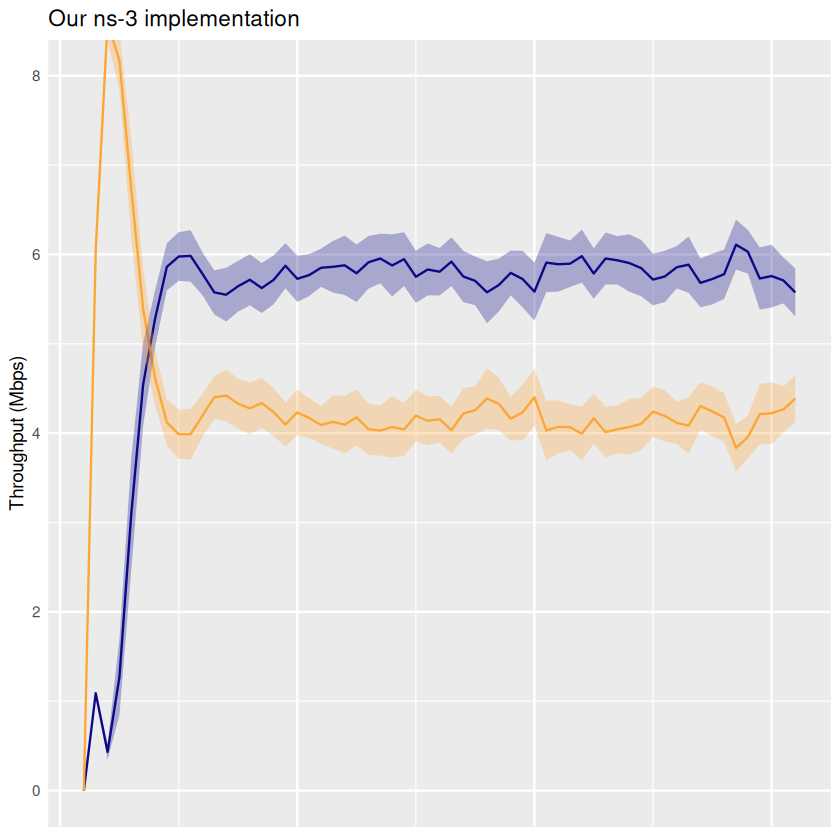

In [54]:
gtruput_s2_ns3 <- ggplot(sum_df_throughput_prague,
                         aes(x = time, y = mean)) +
geom_line(color = "#0D0887") +
geom_line(data = sum_df_throughput_cubic,
          aes(x = time, y = mean),
          color = "#FCA636") +
geom_ribbon(data = sum_df_throughput_prague,
            aes(ymin = ciLow, ymax = ciUp),
            fill = "#0D0887",
            alpha = 0.3) +
geom_ribbon(data = sum_df_throughput_cubic,
            aes(ymin = ciLow, ymax = ciUp),
            fill = "#FCA636",
            alpha = 0.3) +
coord_cartesian(ylim = c(0, 8)) +
ggtitle("Our ns-3 implementation") +
xlab(NULL) +
ylab("Throughput (Mbps)") +
theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank()
)
suppressWarnings(print(gtruput_s2_ns3))

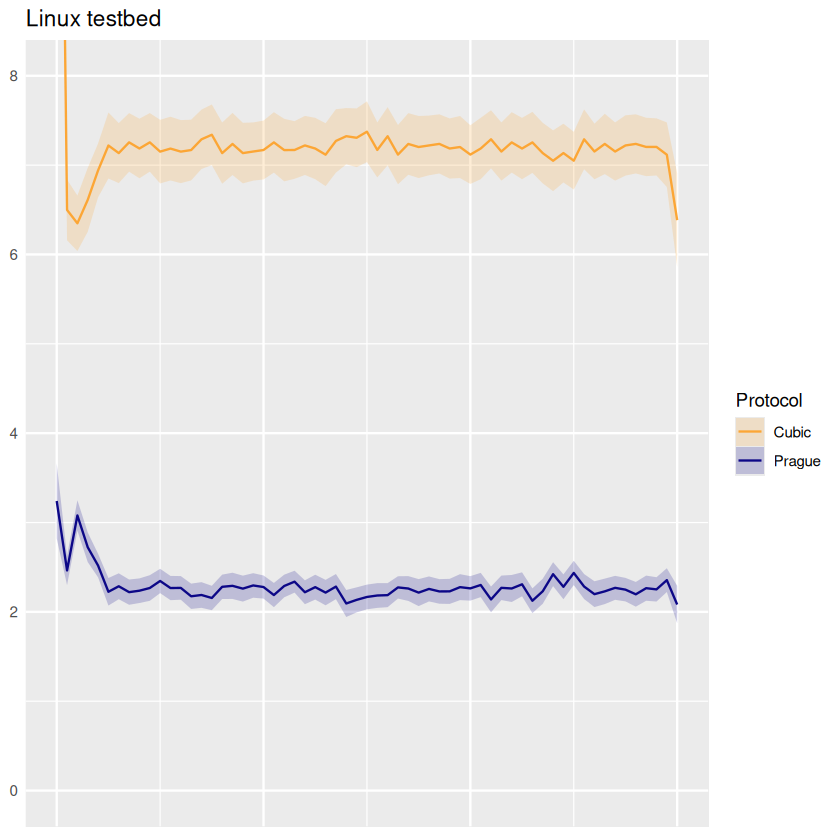

In [55]:
gtruput_s2_tb <- ggplot(truput |>
                  filter(AQM == "DualPI2") |>
                  filter(bw.limit == "10 Mbps & 30 ms"),
                  aes(x = time.round, y = mean)) +
geom_line(aes(color = Protocol)) +
geom_ribbon(aes(ymin = ciLow, ymax = ciUpp, fill = Protocol), alpha = 0.2) +
coord_cartesian(ylim = c(0, 8)) +
scale_color_viridis_d(option = "plasma", begin = 0., end = 0.8, direction = -1) +
scale_fill_viridis_d(option = "plasma", begin = 0., end = 0.8, direction = -1) +
ggtitle("Linux testbed") +
xlab(NULL) +
ylab(NULL) +
theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank()
)
suppressWarnings(print(gtruput_s2_tb))

### RTT

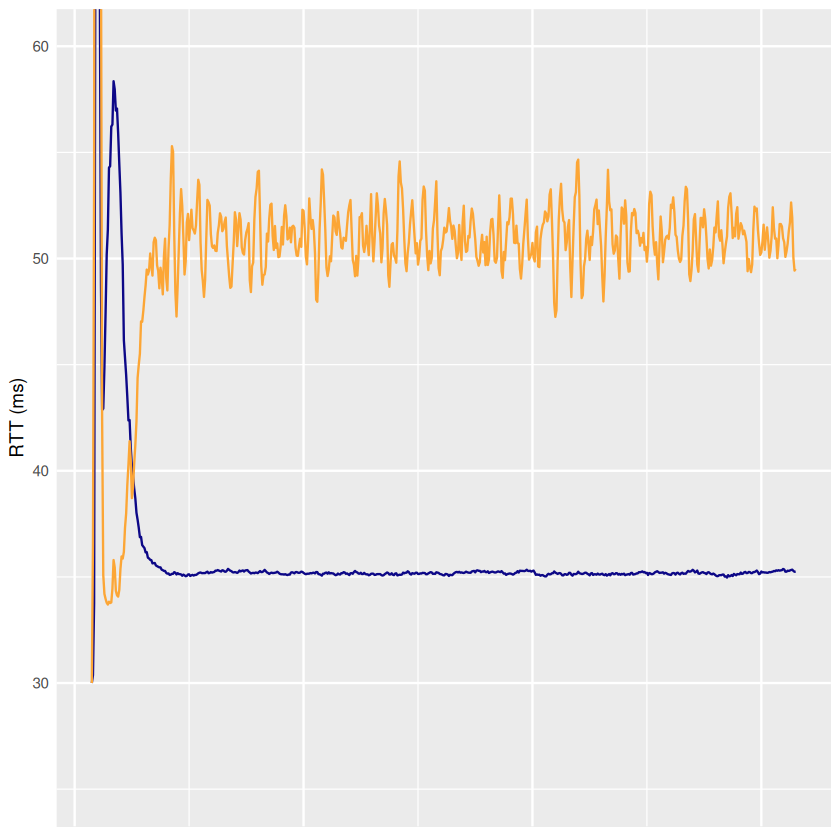

In [51]:
grtt_s2_ns3 <- ggplot(sum_df_prague_rtt,
       aes(x = time, y = mean*1000)) +
geom_line(color = "#0D0887") +
geom_line(data = sum_df_cubic_rtt,
          aes(x = time, y = mean*1000),
          color = "#FCA636") +
coord_cartesian(ylim = c(25, 60)) +
xlab(NULL) +
ylab("RTT (ms)") +
theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank()
)
suppressWarnings(print(grtt_s2_ns3))

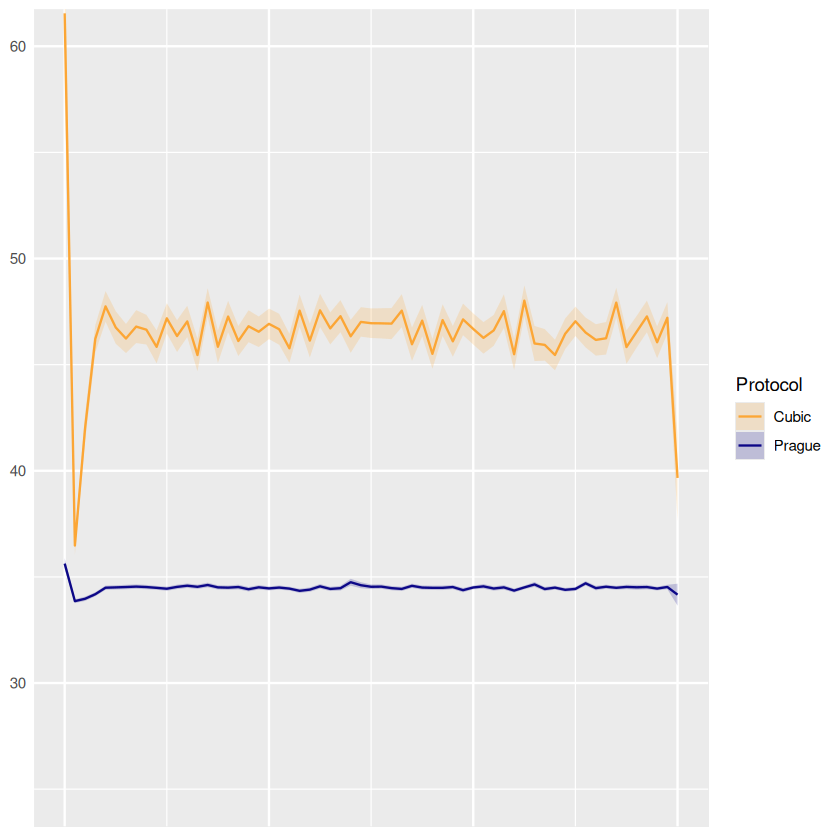

In [52]:
grtt_s2_tb <- ggplot(rtt |>
                  filter(AQM == "DualPI2") |>
                  filter(bw.limit == "10 Mbps & 30 ms"),
                  aes(x = time.round, y = mean)) +
geom_line(aes(color = Protocol)) +
geom_ribbon(aes(ymin = ciLow, ymax = ciUpp, fill = Protocol), alpha = 0.2) +
scale_color_viridis_d(option = "plasma", begin = 0., end = 0.8, direction = -1) +
scale_fill_viridis_d(option = "plasma", begin = 0., end = 0.8, direction = -1) +
coord_cartesian(ylim = c(25, 60)) +
xlab(NULL) +
ylab(NULL) +
theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank()
)
suppressWarnings(print(grtt_s2_tb))

### CWnd

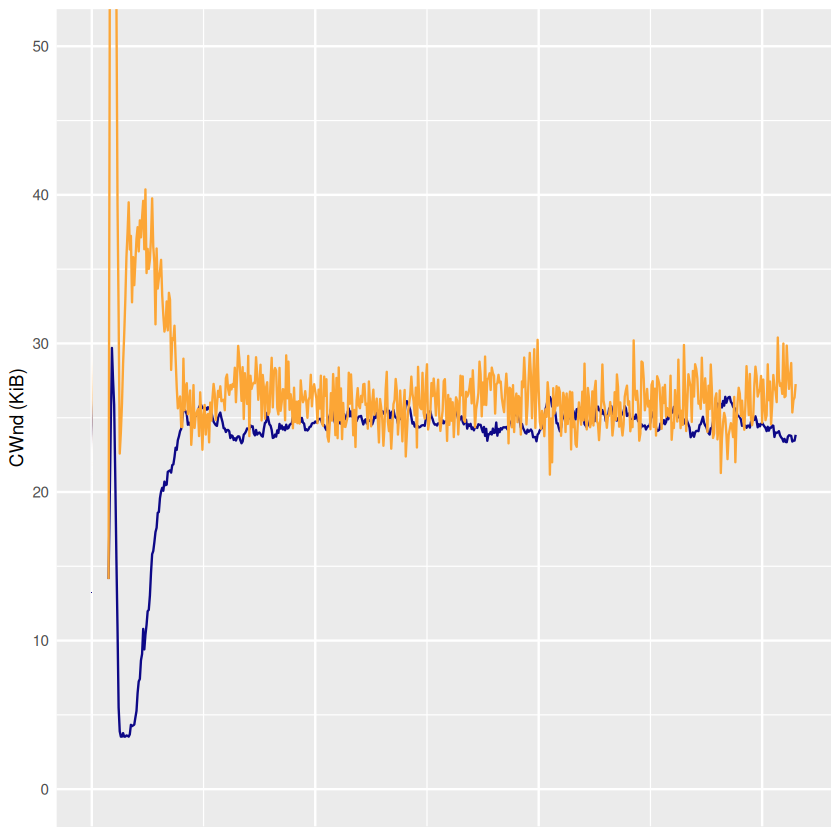

In [55]:
gcwnd_s2_ns3 <- ggplot(sum_df_prague_cwnd,
       aes(x = time, y = (mean/1024))) +
geom_line(color = "#0D0887") +
geom_line(data = sum_df_cubic_cwnd,
          aes(x = time, y = (mean/1024)),
          color = "#FCA636") +
geom_ribbon(data = sum_df_prague_cwnd/1024,
            aes(ymin = ciLow, ymax = ciUp), fill = "#0D0887", alpha = 1) +
geom_ribbon(data = sum_df_cubic_cwnd/1024,
            aes(ymin = ciLow, ymax = ciUp), fill = "#FCA636", alpha = 1) +
coord_cartesian(ylim = c(0, 50)) +
xlab(NULL) +
ylab("CWnd (KiB)") +
theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank()
)
suppressWarnings(print(gcwnd_s2_ns3))

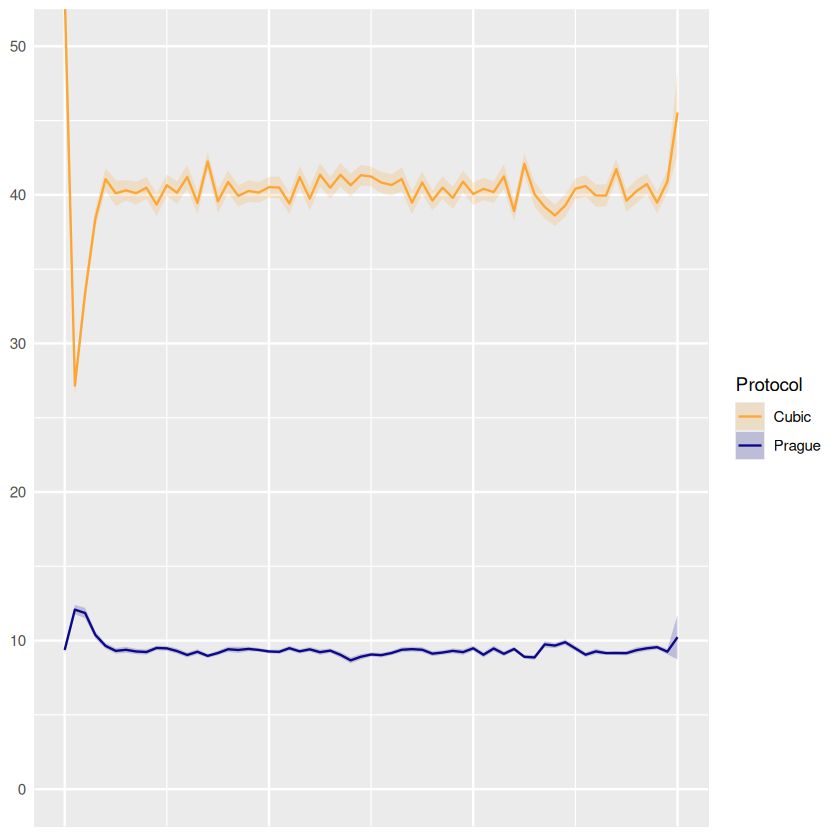

In [56]:
gcwnd_s2_tb <- ggplot(cwnd |>
                  filter(AQM == "DualPI2") |>
                  filter(bw.limit == "10 Mbps & 30 ms"),
                  aes(x = time.round, y = mean)) +
geom_line(aes(color = Protocol)) +
geom_ribbon(aes(ymin = ciLow, ymax = ciUpp, fill = Protocol), alpha = 0.2) +
scale_color_viridis_d(option = "plasma", begin = 0., end = 0.8, direction = -1) +
scale_fill_viridis_d(option = "plasma", begin = 0., end = 0.8, direction = -1) +
coord_cartesian(ylim = c(0, 50)) +
xlab(NULL) +
ylab(NULL) +
theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank()
)
suppressWarnings(print(gcwnd_s2_tb))

### Queue delay

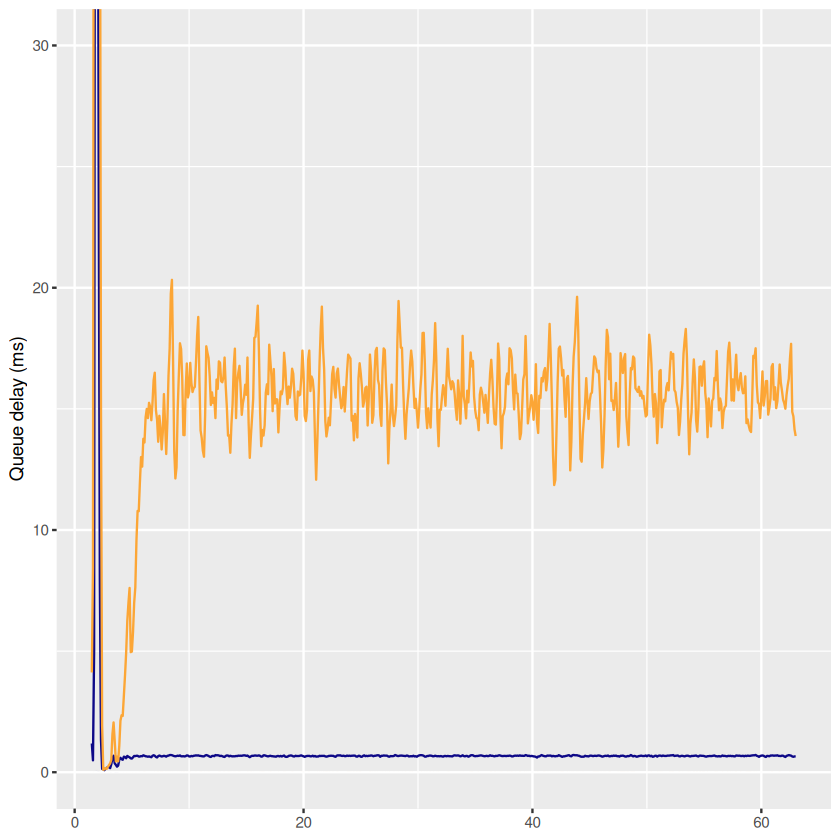

In [60]:
gqdelay_s2_ns3 <- ggplot(sum_df_queue_sojourn_l4s,
       aes(x = time, y = mean*1000)) + # s -> ms
geom_line(color = "#0D0887") +
geom_line(data = sum_df_queue_sojourn_classic,
          aes(x = time, y = mean*1000),
          color="#FCA636") +
geom_ribbon(data = sum_df_queue_sojourn_l4s,
            aes(ymin = ciLow, ymax = ciUp),  fill = "#0D0887", alpha = 0.3) +
geom_ribbon(data = sum_df_queue_sojourn_classic,
            aes(ymin = ciLow, ymax = ciUp),  fill = "#FCA636", alpha = 0.3) +
coord_cartesian(ylim = c(0, 30)) +
xlab(NULL) +
ylab("Queue delay (ms)")
suppressWarnings(print(gqdelay_s2_ns3))

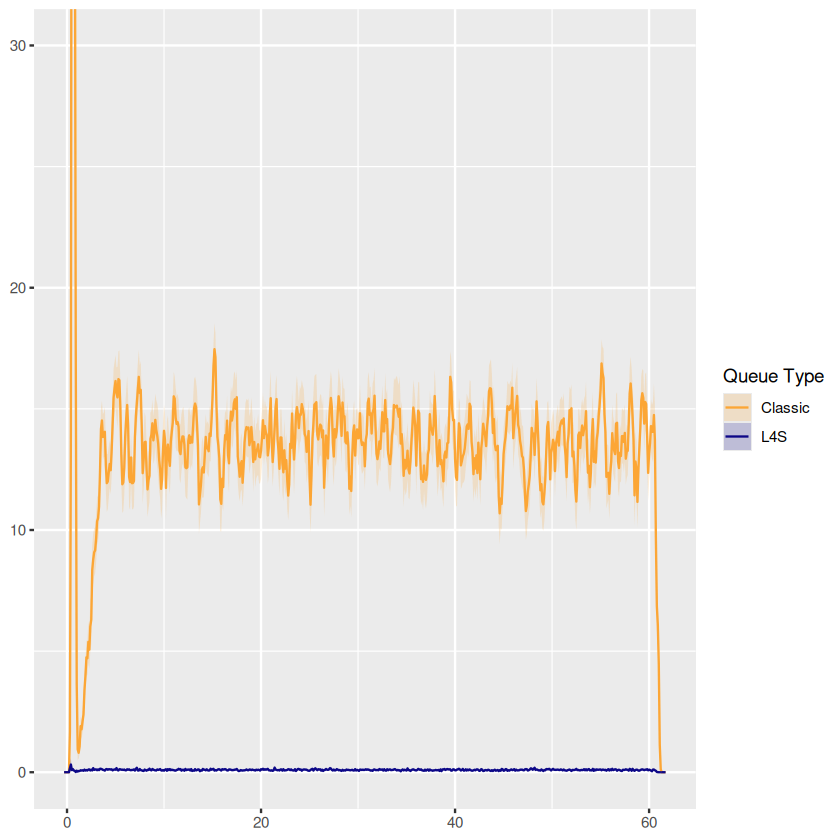

In [61]:
gqdelay_s2_tb <- ggplot(qdelay |>
                  filter(bw.limit == "10 Mbps & 30 ms") |>
                  filter(AQM == "DualPI2") |>
                  filter(time >= 3),
                  aes(x = time - 3.3, y = mean)) +
geom_line(aes(color = Delay.type)) +
geom_ribbon(aes(ymin = ciLow, ymax = ciUpp, fill = Delay.type), alpha = 0.2) +
coord_cartesian(ylim = c(0, 30)) +
scale_color_viridis_d(option = "plasma", begin = 0., end = 0.8, direction = -1) +
scale_fill_viridis_d(option = "plasma", begin = 0., end = 0.8, direction = -1) +
xlab(NULL) +
ylab(NULL) +
labs(colour = "Queue Type", fill = "Queue Type")
suppressWarnings(print(gqdelay_s2_tb))

### ECN mark

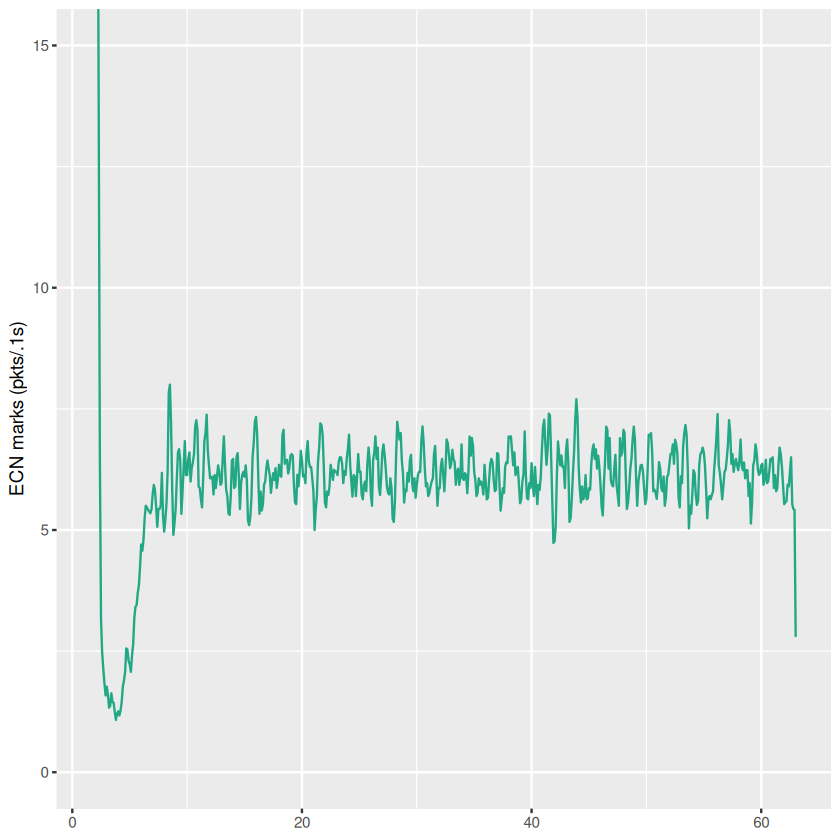

In [62]:
gecnmark_s2_ns3 <- ggplot(sum_df_count_mark_l4s,
       aes(x = time, y = mean)) +
geom_line(color = "#22a884") +
coord_cartesian(ylim = c(0, 15)) +
xlab(NULL) +
ylab("ECN marks (pkts/.1s)")
suppressWarnings(print(gecnmark_s2_ns3))

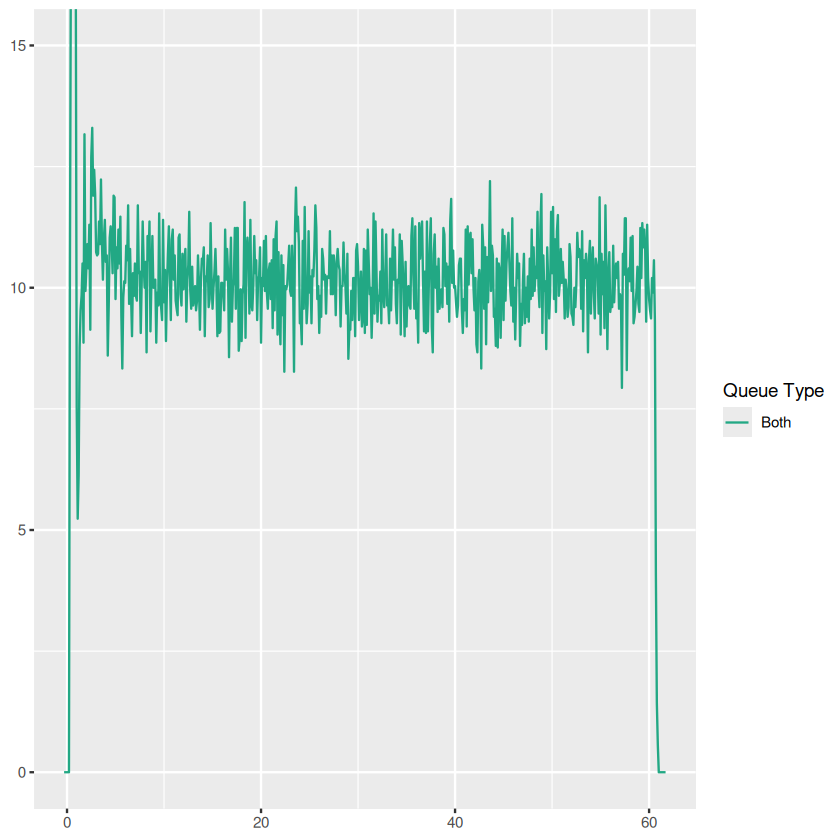

In [63]:
gecnmark_s2_tb <- ggplot(ecnmark |>
                  filter(AQM == "DualPI2") |>
                  filter(Delay.type == "Classic") |>
                  filter(bw.limit == "10 Mbps & 30 ms") |>
                  mutate(Delay.type = recode(Delay.type, "Classic" = "Both")) |>                  
                  filter(time >= 3),
                  aes(x = time - 3.3, y = mean)) +
geom_line(aes(color = Delay.type)) +
scale_color_viridis_d(option = "viridis", begin = 0., end = 0.6, direction = -1) +
scale_fill_viridis_d(option = "viridis", begin = 0., end = 0.6, direction = -1) +
coord_cartesian(ylim = c(0, 15)) +
xlab(NULL) +
ylab(NULL) +
labs(colour = "Queue Type", fill = "Queue Type")

suppressWarnings(print(gecnmark_s2_tb))

### Prob

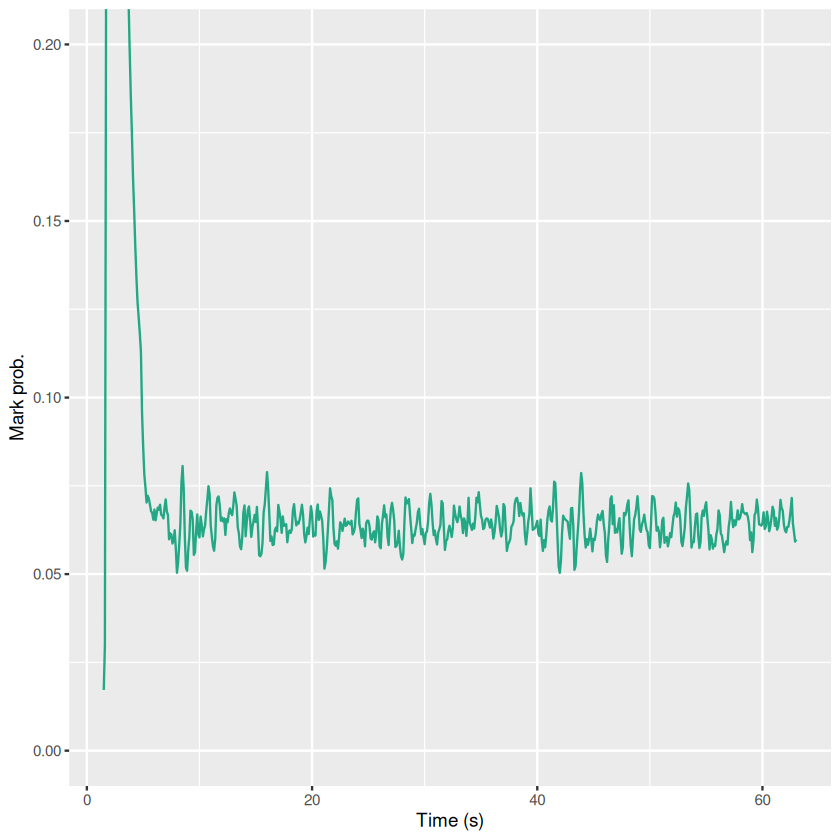

In [64]:
gprob_s2_ns3 <- ggplot(sum_df_queue_prob_coupled,
       aes(x = time, y = mean/2)) +
geom_line(color = "#22a884") +
coord_cartesian(ylim = c(0, 0.2)) +
xlab("Time (s)") +
ylab("Mark prob.")
suppressWarnings(print(gprob_s2_ns3))

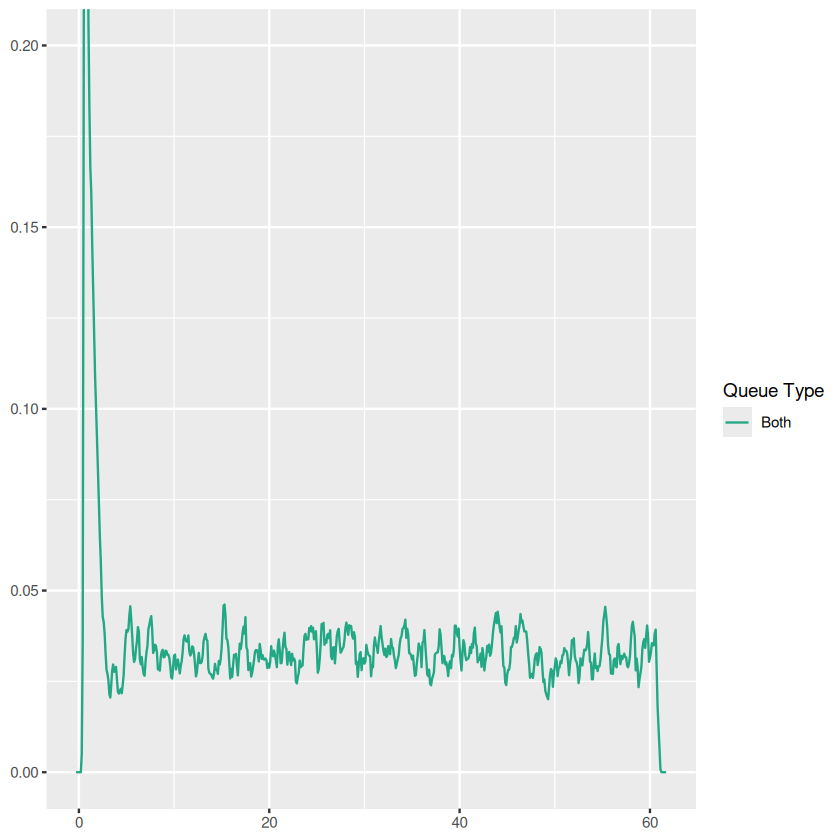

In [58]:
gprob_s2_tb <- ggplot(probs |>
                  filter(AQM == "DualPI2") |>
                  filter(Delay.type == "Classic") |>
                  filter(bw.limit == "10 Mbps & 30 ms") |>
                  mutate(Delay.type = recode(Delay.type, "Classic" = "Both")) |>                  
                  filter(time >= 3),
                  aes(x = time - 3.3, y = mean)) +
geom_line(aes(color = Delay.type)) +
scale_color_viridis_d(option = "viridis", begin = 0., end = 0.6, direction = -1) +
scale_fill_viridis_d(option = "viridis", begin = 0., end = 0.6, direction = -1) +
coord_cartesian(ylim = c(0, 0.2)) +
xlab(NULL) +
ylab(NULL) +
labs(colour = "Queue Type", fill = "Queue Type")

suppressWarnings(print(gprob_s2_tb))

### save

In [70]:
ggsave(
    "plots/scenario2-10mbps-30ms.pdf",
    plot = ((gtruput_s2_ns3 | gtruput_s2_tb) /
            (grtt_s2_ns3 | grtt_s2_tb) /
            (gcwnd_s2_ns3 | gcwnd_s2_tb) /
            (gqdelay_s2_ns3 | gqdelay_s2_tb) /
            (gecnmark_s2_ns3 | gecnmark_s2_tb)/
            (gprob_s2_ns3 | gprob_s2_tb))  + plot_layout(guides = 'collect') &
    theme_minimal() +
    theme(
        plot.title   = element_text(size = 18, family = "Carlito",
                                    margin = margin(0,0,15,0,"pt")),
        strip.text.x = element_text(size = 10, family = "Carlito", hjust=0),
        strip.background = element_rect(fill = "#f7f7f7", color = "#d9d9d9"),
        strip.text.y = element_text(size = 10, family = "Carlito", hjust=0),
        axis.title.y = element_text(size = 10,
                                    family = "Carlito",
                                    hjust = 1,
                                    margin = margin(0,5,0,0,"pt")),
        axis.title.x = element_text(size = 10, family = "Carlito", hjust=0),
        legend.title = element_text(family = "Carlito"),
        legend.background = element_rect(fill = "#f7f7f7", color = "#d9d9d9"),
        legend.justification = c(0,1),
        legend.position = "bottom",
        legend.text = element_text(size = 10, family = "Carlito"),
        panel.border = element_rect(color = "#d9d9d9", fill = NA)
    ),
    height = 10,
    width = 7,
    device = cairo_pdf,
    dpi = 160,
)